<a href="https://colab.research.google.com/github/cjaucian/MAT421/blob/main/ModuleH_22_4_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 22.4 Numerical Error and Instability

When discussing integration schemes of ODEs, there are two issues we must keep in mind: accuracy and stability. Accuracy is the ability of an integration scheme to get close to the exact solution when using a function with a step size of h, generally we do not know the exact solution. Stability in an integration scheme is the ability to minimize error which wants to continue growing as it integrates in time. We know the scheme is stable if the error remains constant, or does not grow. If the error grows during integration, then the scheme is unstable. This can be dependent upon the selection of h, where some schemes are stable at a specific h value and unstable for other values. Despite being stable at certain choices, the scheme would still be considered unstable.


The idea of stability can be highlighted by comparing the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to numerically solve the pendulum equation.

**Example**  Use the Euler Explicit, Euler Implicit, and Trapezoidal Formulas to solve the pendulum equation over the time interval [0, 5] in increments of 0.1 and for an initial solution of S0 = [1; 0]. For the model parameters using the square root of (g/l) = 4. Plot the approximate solution on a single graph.

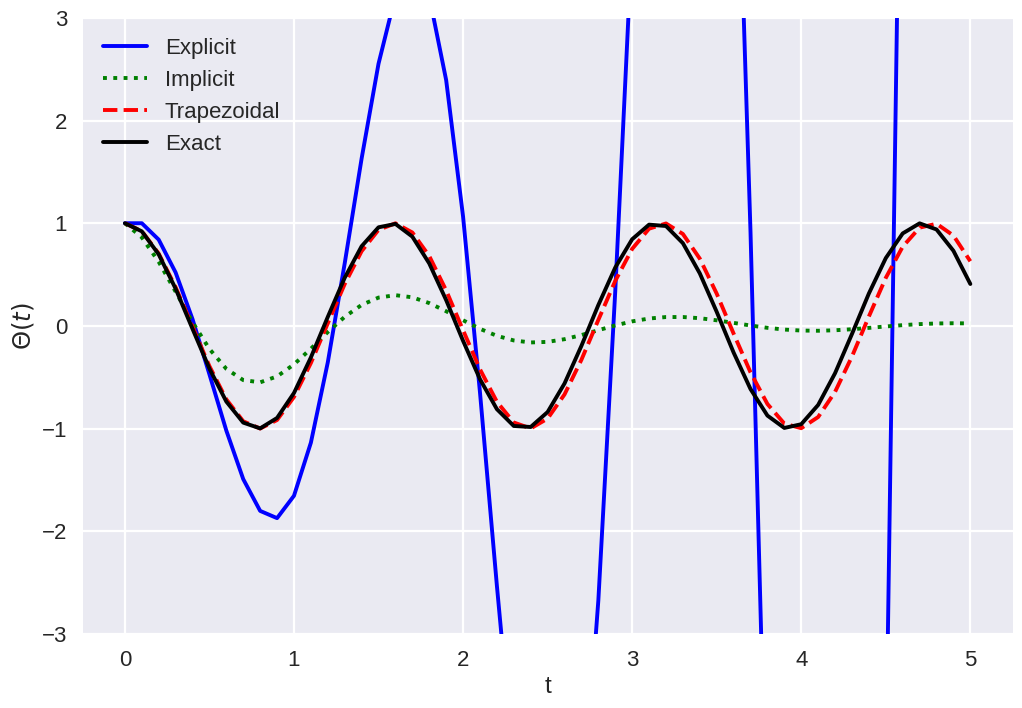

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-poster')

%matplotlib inline

# define step size
h = 0.1
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation frequency of pendelum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h],
               [-w**2*h, 1]])

m_i = inv(np.array([[1, -h],
                    [w**2*h, 1]]))

m_t = np.dot(inv(np.array([[1, -h/2],[w**2*h/2, 1]])),
                 np.array([[1, h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e, s_e[j, :])
    s_i[j+1, :] = np.dot(m_i, s_i[j, :])
    s_t[j+1, :] = np.dot(m_t, s_t[j, :])

plt.figure(figsize = (12, 8))
plt.plot(t, s_e[:, 0], 'b-')
plt.plot(t, s_i[:, 0], 'g:')
plt.plot(t, s_t[:, 0], 'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', 'Trapezoidal', 'Exact'])
plt.show()

Looking at the solutions on the plot above, it is clear that the Euler Explicit scheme is unstable. The Euler Implicit scheme is incorrect because it is decaying exponentially. The Trapezoidal method is correct despite the small shifts that occur as time increases.

# 22.5 Predictor-Corrector Methods

We know that a given state value and time in the function F(t, S(t)) will return the change in the state dS(t)/dt. The Predictor-corrector method for solving initial value problems will help to improve the approximation accuracy. It does this by checking the F function in several different locations, these are the predictions. Then the average weight of those predictions will be used to update the state, this is the corrections. The predictor formula is explicit and estimates the solution at a time, tj+1. Once we have the solution, S(tj+1), the corrector formula is used to improve the accuracy. This is done by taking S(tj+1) to be the right-hand side of an implicit formula so the corrector can calculate a new solution.


Here is an example of the predictor step of the midpoint method:

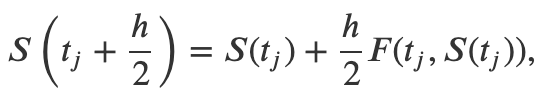

This is the prediction of the solution halfway between tj and tj+1.

Then it calculates the corrector corrector step:

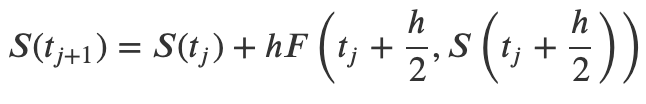

**Runge Kutta Methods**

The most widely used methods for solving ODEs is the Runge Kutta methods or RK. It works by using a truncated Taylor series so we can improve accruacy of numerical integration by keeping more terms.

**Second order Runge Kutta method**

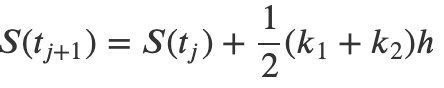

with:

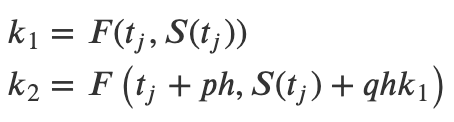

**Fourth-order Runge Kutta method**

Similar to the approach we took in the second order Runge Kutta method, the Fourth-Order Runge Kutta method (RK4) uses a truncated Taylor series for greater accuracy. Unlike second order Runge Kutta, RK4 will have 4 points. This gives us:

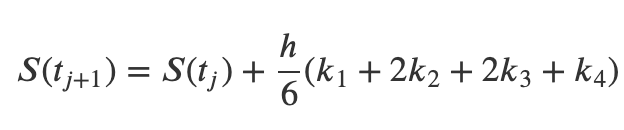


and

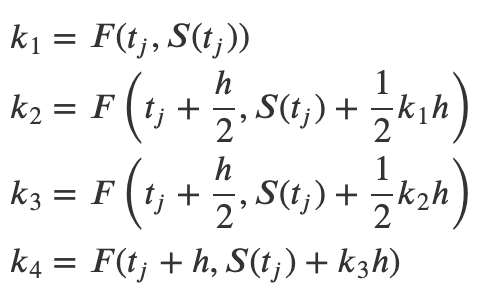

# 22.6 Python ODE Solvers

In Python the most common built-in function for solving initial value problems is scipy.integrate.solve_ivp.

**Example**  Consider the ODE dS(t)/dt = cos(t) for an initial value S0 = 0. The exact solution to this problem is S(t) = sin(t). Use solve_ivp to approximate the solution to this initial value problem over the interval [0, π]. Plot the approximate solution versus the exact solution and the relative error over time.

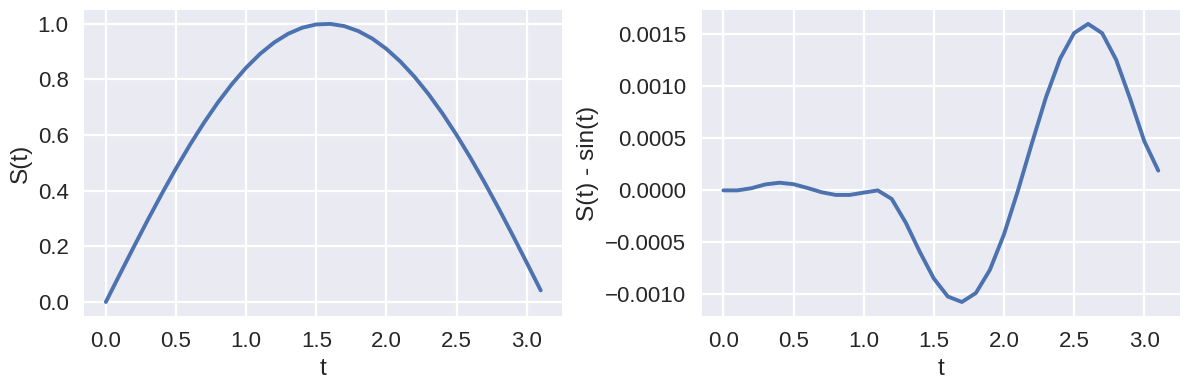

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-v0_8-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.1)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

The images above show the integration of dS(t)/dt = cos(t) with the Python function solve_ivp and the difference between the solution from solve_ivp and the analytical solution. The difference between solve_ivp and the analytical solution of the ODE is very small. We could also make changes to the relative and absolute tolerances to control the error.

**Example**  Using the rtol and atol to make the difference between the approximate and exact solution is less than 1e-7.

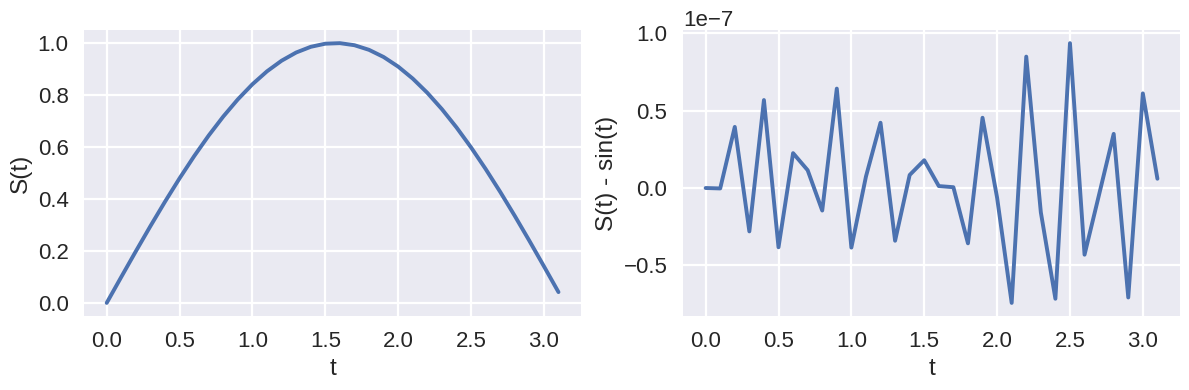

In [ ]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = [12, 4])
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - sin(t)')
plt.tight_layout()
plt.show()

**Example**  Consider the ODE dS(t)/dt = -S(t), with an initial value of S0 = 1. The exact solution to this problem is S(t) = e^-t. Use solve_ivp to approximate the solution to this initial value problem over the interval [0,1]. Plot the approximate solution versus the exact solution, and the relative error over time.

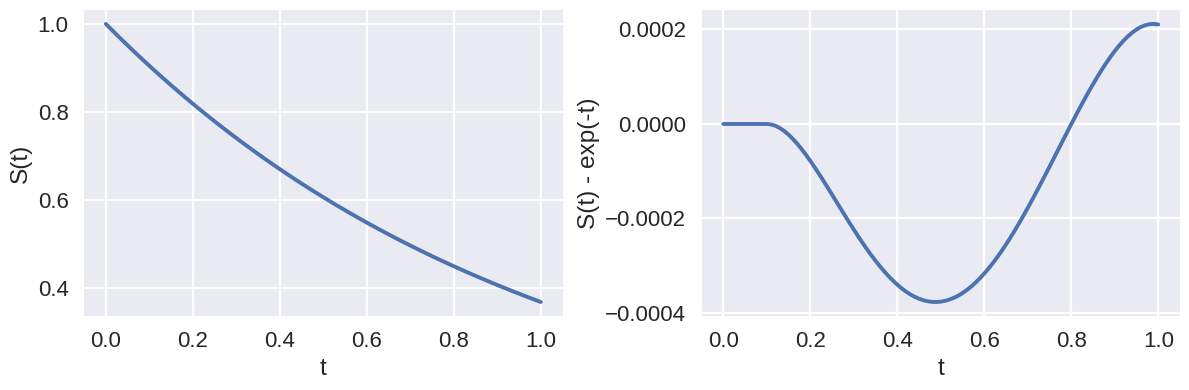

In [ ]:
F = lambda t, s: -s

t_eval = np.arange(0, 1.01, 0.01)
sol = solve_ivp(F, [0, 1], [1], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] - np.exp(-sol.t))
plt.xlabel('t')
plt.ylabel('S(t) - exp(-t)')
plt.tight_layout()
plt.show()

**Example**  Let the state of a system be defined by S(t) = [x(t); y(t)], and let the evolution of the system be defined by the ODE: dS(t)/dt = [0 t^2; -t 0]S(t). Use solve_ivp to solve this ODE for the time interval [0, 10] with an initial value of S0 = [1; 1]. Plot the solution in (x(t), y(t)).

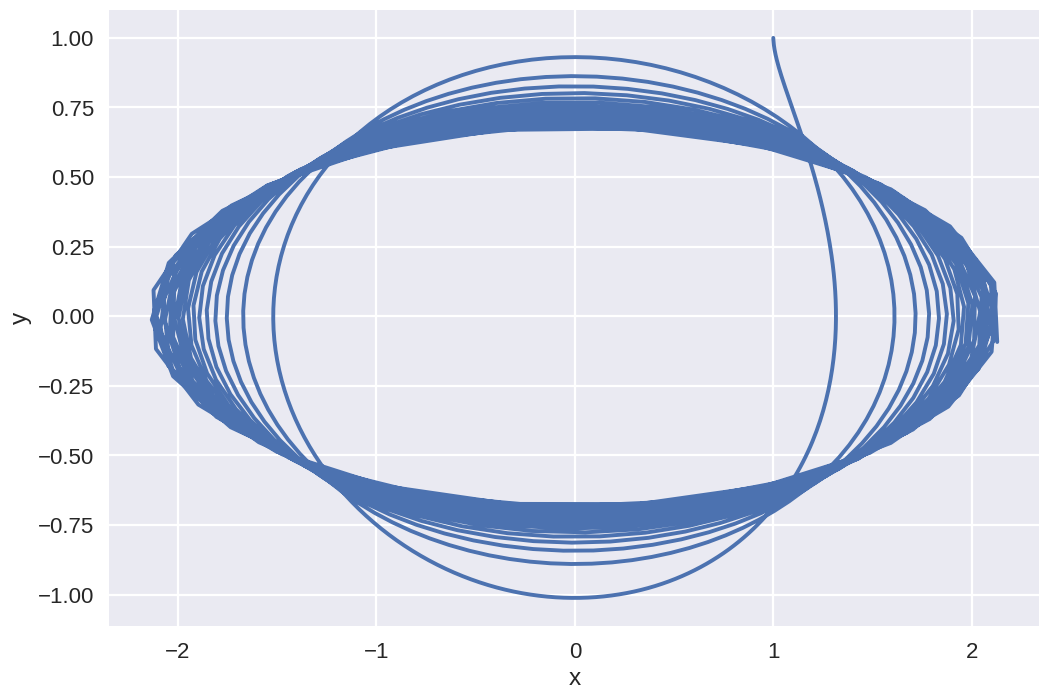

In [ ]:
F = lambda t, s: np.dot(np.array([[0, t**2], [-t, 0]]), s)

t_eval = np.arange(0, 10.01, 0.01)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()